## Question 1: Gaussian Quadrature
\begin{equation}
    \mathrm{erf}(3) = \frac{2}{\sqrt{\pi}} \int_0^3 e^{-t^2}\mathrm{d}t
\end{equation}

In [1]:
#PART A
# Andrew Hardy
#i) 
#import packages
import numpy as np
from scipy.special import erf
from gaussxw import gaussxw
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# defining variables taken from Q2.A from Lab 2, done by Brayden.
#define a function for Trapezoid rule 
def Trapezoid(function, i_N, f_a, f_b):
    """
    A function for performing numerical integration of the mathematical function 
    the trapezoid rule for N steps between a and b.
    INPUT:
    function [function handle of single variable] is the function whose integral is to be numerically approximated 
    N [int] number of steps
    a [float] lower bound of integration
    b [float] upper bound of integration
    """
    f_h = (f_b-f_a)/i_N #width of slices
    f_s = 0.5*function(f_a) + 0.5*function(f_b) #the constant terms in the series expansion defining the trapezoid rule as in equation 5.3 of Newman

    for j in range(1,i_N):
        f_s += function(f_a+j*f_h)
        
    f_integral = f_h*f_s
    return f_integral

#define a function for Simpson's rule
def Simpson(function, i_N, f_a, f_b):
    """
    A function for performing numerical integration of the mathematical function according to
    Simpson's rule for N steps between a and b.
    INPUT:
    function [function handle of single variable] is the function whose integral is to be numerically approximated 
    N [int] number of steps
    a [float] lower bound of integration
    b [float] upper bound of integration
    """
    f_h = (f_b-f_a)/i_N #width of slices
    f_s = function(f_a) + function(f_b) #the constant terms in the series expansion defining the trapezoid rule as in equation 5.3 of Newman
    
    for k in range(1,i_N,2): #loop over odd terms
        f_s += 4*function(f_a+k*f_h)
    for k in range(2,i_N,2): #loop over even terms
        f_s += 2*function(f_a+k*f_h)
        
    f_integral = f_h*f_s/3
    return f_integral
def Gaussian(function, i_N, f_a, f_b):
    """
    A function for performing numerical integration of the mathematical function according to
    Gaussian Quadrature for N steps between a and b. Basically ripped off Newman's gaussint.py
    INPUT:
    function [function handle of single variable] is the function whose integral is to be numerically approximated 
    N [int] number of steps
    a [float] lower bound of integration
    b [float] upper bound of integration
    """
    f_x,f_w = gaussxw(i_N)
    f_xp = 0.5*(f_b-f_a)*f_x + 0.5*(f_b+f_a)
    f_wp = 0.5*(f_b-f_a)*f_w

    # Perform the integration
    f_s = 0.0
    for k in range(i_N):
        f_s += f_wp[k]*function(f_xp[k])
    return f_s


In [3]:
#define function to be integrated
def errorfunction(f_t):
    return 2/np.sqrt(np.pi)*np.exp(-f_t**2) # define the Error function

In [4]:
i_length = int((1000-8)/2+1)
a_erf_trap = np.empty(i_length)
a_erf_simp = np.empty(i_length)
a_erf_gauss = np.empty(i_length)
a_N = np.empty(i_length)
# define several empty arrays to be filled with a sampling of points from N = 8, 1000 by even numbers

t = np.empty(10000)
i = 8
j = 0
while i<=1000:
    a_N[j] = i
    a_erf_trap[j-8] = Trapezoid(errorfunction, i,0,3)
    a_erf_simp[j-8] = Simpson(errorfunction, i, 0,3)
    a_erf_gauss[j-8] = Gaussian(errorfunction, i, 0,3)
    i += 2
    j += 1

In [5]:
print('Trapezoid rule evaluation of erf(3) for 8<N<1000:')
#print(a_erf_trap)
print('Simpson rule evaluation of erf(3) for 8<N<1000:')
#print(a_erf_simp)
print('Gaussian quadrature evaluation of erf(3) for 8<N<1000:')
#print(a_erf_gauss)

Trapezoid rule evaluation of erf(3) for 8<N<1000:
Simpson rule evaluation of erf(3) for 8<N<1000:
Gaussian quadrature evaluation of erf(3) for 8<N<1000:


In [6]:
# Brayden I don't think this is necessary or useful? 
mn_trap = np.mean(a_erf_trap)
mn_simp = np.mean(a_erf_simp)
mn_gauss = np.mean(a_erf_gauss)
sd_trap = np.std(a_erf_trap)
sd_simp = np.std(a_erf_simp)
sd_gauss = np.std(a_erf_gauss)
print('Mean value for erf(3) with Trapezoid rule was {0} with standard deviation of {1}'.format(mn_trap, sd_trap))
print('Mean value for erf(3) with Simpson rule was {0} with standard deviation of {1}'.format(mn_simp, sd_simp))
print('Mean value for erf(3) with Gaussian quadrature was {0} with standard deviation of {1}'.format(mn_gauss, sd_gauss))

Mean value for erf(3) with Trapezoid rule was 0.9999778231853969 with standard deviation of 5.715079892948464e-07
Mean value for erf(3) with Simpson rule was 0.9999779012620776 with standard deviation of 9.939718061538508e-08
Mean value for erf(3) with Gaussian quadrature was 0.9999779095625705 with standard deviation of 1.3022291594138554e-09


In [7]:
#1b)
#relative error of  compared to the Scipy true value
f_true = erf(3)
a_rel_simp = (a_erf_simp - f_true)/f_true
a_rel_trap = (a_erf_trap - f_true)/f_true
a_rel_gauss = (a_erf_gauss - f_true)//f_true

In [8]:
#1b)
#get practical error of Gauss, trap, simp
a_N2 = 2*a_N    # double the size of N 
a_N1 = a_N//2   # Half the Size of N, I think this is then 1/4??
# Defining empty arrays
a_erf_gauss_2 = np.empty(len(a_N2))
a_erf_simp_1 = np.empty(len(a_N1))
a_erf_trap_1 = np.empty(len(a_N1))
for i in range(len(a_N2)):
    #gauss
    i_n = int(a_N2[i])
    a_erf_gauss_2[i] = Gaussian(errorfunction, i_n, 0,3)
    #trap
    i_n_p = int(a_N1[i])
    a_erf_trap_1[i] = Trapezoid(errorfunction, i_n, 0, 3)
    #simp
    a_erf_simp_1[i] = Simpson(errorfunction, i_n, 0, 3)
    
a_err_gauss = a_erf_gauss_2 - a_erf_gauss
a_err_trap = (a_erf_trap - a_erf_trap_1)/3
a_err_simp = (a_erf_simp - a_erf_simp_1)/15


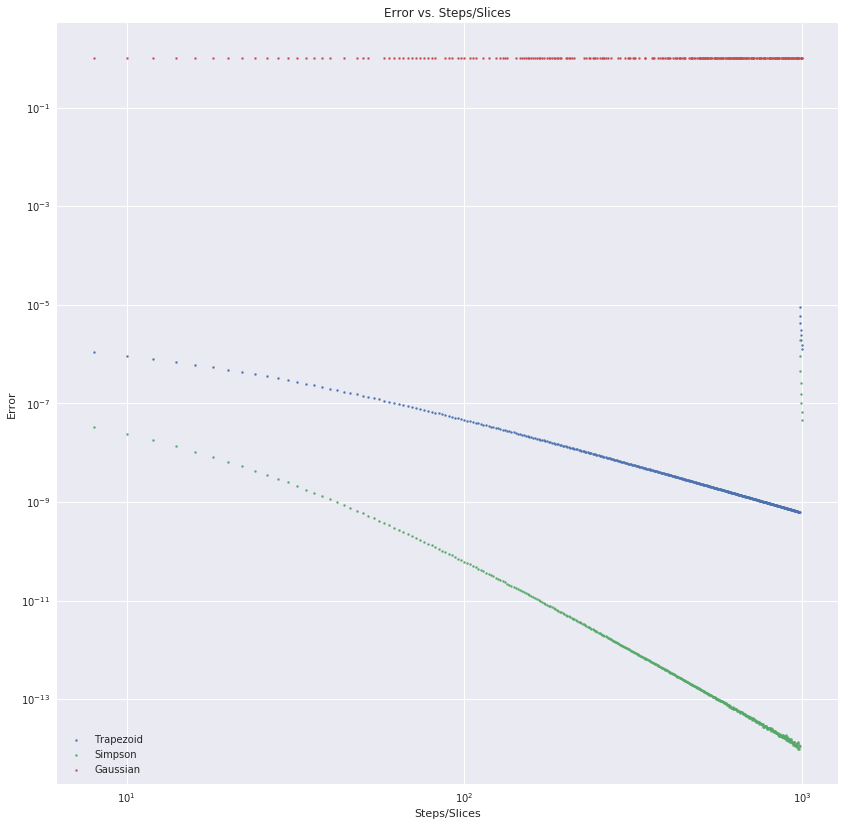

In [9]:

# plotting function of the three methods
plt.figure(figsize = (14,14))
plt.yscale('log')
plt.xscale('log')
plt.scatter(a_N, abs(a_rel_trap), s = 4, label = 'Trapezoid')
plt.xlabel('Steps/Slices')
plt.ylabel('Error')
plt.title('Error vs. Steps/Slices')
plt.legend()

#plt.figure()

plt.scatter(a_N, abs(a_rel_simp), s = 4,label = 'Simpson')
plt.xlabel('Steps/Slices')
plt.ylabel('Error')
plt.title('Error vs. Steps/Slices')
#plt.legend()

#plt.figure()

plt.scatter(a_N, abs(a_rel_gauss),s = 4, label = 'Gaussian')
plt.xlabel('Steps/Slices')
plt.ylabel('Error')
plt.title('Error vs. Steps/Slices')
plt.legend()

In [10]:
print(np.mean(a_err_trap))
print(np.mean(a_err_simp))
print(np.mean(a_err_gauss))
print(np.std(a_err_trap))
print(np.std(a_err_simp))
print(np.std(a_err_gauss))

-2.14242045531302e-08
-5.080091658613065e-10
-5.956925272750222e-11
1.898264394564778e-07
6.640031109289699e-09
1.3022291162422363e-09


### Part 3, blowing snow


In [57]:
a_u10 = np.array([6, 8, 10])
a_th = np.array([24, 48, 72])
a_ta = np.arange(-60, 30, 1)
def Umean(a_ta, i_th):
    return 11.2 + 0.365 * a_ta + 0.00706 * a_ta ** 2 + 0.9 * np.log(i_th)
def Delta(a_ta):
    return 4.3 + 0.145 * a_ta + 0.00196 * a_ta** 2
def Perfversion(u):
    denom = np.sqrt(2 * np.pi) * Delta(a_ta)
    numer = errorfunction((Umean(a_ta, i_th) - u) / (np.sqrt(2) * Delta(a_ta)))
    return numer / denom
def P(i_u10, a_ta, i_th):
    a = 0  # beginning value
    N = 100  # number of steps
    return Gaussian(Perfversion, N, a, i_u10)

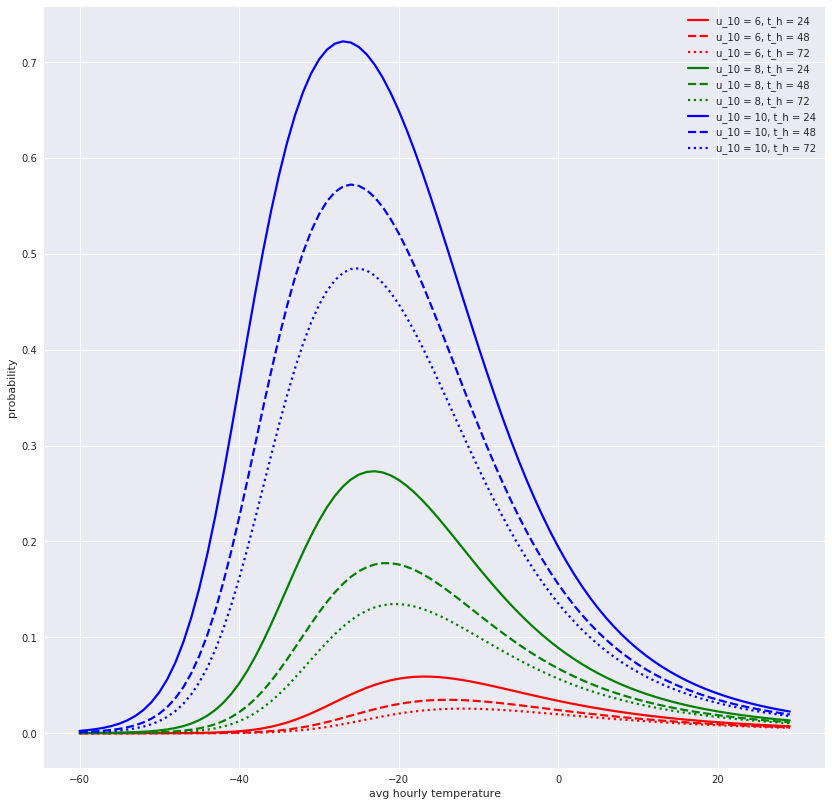

In [59]:
# Choosing color for characterizing u_10
colours = ('r', 'g', 'b')

# Choosing line type to characterize t_h
lines = ('-','--',  ':')


plt.figure(figsize=(14,14))
plt.clf()
for (i_u10, colour) in zip(a_u10, colours):
	# For each u_10, we have different color
	
	for (i_th, line) in zip(a_th, lines):
	# For each different t_h, we get a different line
	
		plot_str = colour + line
		plt.plot(a_ta, P(i_u10, a_ta, i_th), plot_str, linewidth = 2.2, \
	    label = 'u_10 = {0}, t_h = {1}'.format(i_u10, i_th))

plt.xlabel('avg hourly temperature')
plt.ylabel('probability')
plt.legend(loc = 'best')

#### Dependency of blown snow based on several variables
The most immediately visible dependence is that the snow probability has a vaguely gaussian probability distribuition, which peaks around -25 or so Celcius.   
The next largest dependence is that as the strength of wind increases, the probability drastically increases, that is rather obvious. 
There's a third dependence, where younger snow, shown by the solid line, has a higher probability of blowing. This is also intuitive, because young snow feels fluffier and is less compact 